In [38]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, mean_absolute_error

from mpl_toolkits import mplot3d

import plotly.express as px

import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import correlation, cosine

## Method to get Principal Components.

In [2]:
def get_pca(data,n):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(data)
    principalComponents = pd.DataFrame(data = principalComponents)
    return(pca,principalComponents)

## Method to plot Pareto of the Principal Components.

In [3]:
def plot_pareto(pca, principalComponents):
    
    plt.bar(principalComponents.columns,pca.explained_variance_ratio_)
    df = pd.DataFrame({'var':pca.explained_variance_ratio_,
                       'PC':principalComponents.columns})
    df["cummulative"] = df["var"].cumsum()/df["var"].sum()*100
    
    
    fig, ax = plt.subplots()
    ax.bar(df['PC'], df["var"])
    ax2 = ax.twinx()
    ax2.plot(df['PC'], df["cummulative"], color="C1", marker="D")
    ax2.yaxis.set_major_formatter(PercentFormatter())

    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")
    plt.show()

### - Importing the Useritem Matrix and replacing NA,
### - Replacing ratings with 1 (indicating product bought)
### - Applying PCA for dimension reduction.

In [ ]:
# data = np.random.randint(5, size=(20, 50))

# data=pd.DataFrame(data)
# data

In [4]:
# Importing the Useritem Matrix.
useritem = pd.read_csv('/Users/abdulrehman/Desktop/usml/data/AMAZON_FASHION_user_itemset.csv')

# Replacing NA with 0 and Replacing ratings with 1 (indicating product bought).
data = useritem.loc[:, useritem.columns != 'reviewerID']
data = data.fillna(0)
# data = data.div(5)

# Applying PCA for dimension reduction.
pca , principalComponents = get_pca(data,25)

### - Plotting pareto to visualise the principal components.

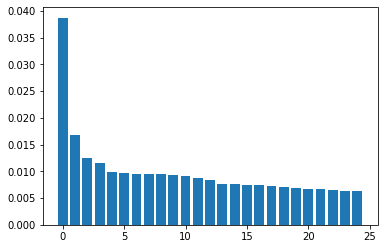

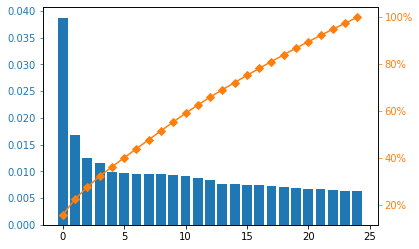

In [5]:
plot_pareto(pca, principalComponents)

### Plotting the Dendrogram with cosine distance and single linkage.

In [ ]:
dendogram = sch.dendrogram(sch.linkage(principalComponents,method='single', metric="cosine"))

### Plotting the Dendrogram with cosine distance and complete linkage.

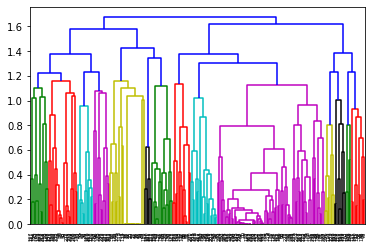

In [6]:
dendogram = sch.dendrogram(sch.linkage(principalComponents,method='complete', metric="cosine"))

### Plotting the Dendrogram with cosine distance and average linkage.

In [ ]:
dendogram = sch.dendrogram(sch.linkage(principalComponents,method='average', metric="cosine"))

##### From the dendrogram we can see that cosine distanc with Complete linkage gives the best reults.
##### We can see that 10 looks like a good value for n_clusters.
##### We now run Agglomerative Clustering and get labels to cluster similar users.

In [10]:
aggclust = AgglomerativeClustering(8, affinity='cosine', linkage='complete')

In [11]:
hc = aggclust.fit_predict(principalComponents)
# aggclust.get_params()

In [12]:
unique_elements, counts_elements = np.unique(hc, return_counts=True)
print("Frequency of unique values in the labels array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values in the labels array:
[[ 0  1  2  3  4  5  6  7]
 [20 96 15 14 25 23 34 13]]


In [13]:
# data = data.div(0.2)
data['labels'] = pd.DataFrame(hc)
data

,B000AO7PY0,B000BD7SGK,B000EE1NNA,B000ER9V68,B000JOOR7O,B000K2PJ4K,B000KPIHQ4,B000NBIMG0,B000NGJ41W,B000V0IBDM,...,B01HBJW7DU,B01HC6I664,B01HC7565W,B01HD09GLI,B01HEBZTI0,B01HGIDX5M,B01HH3WJVA,B01HI84VBA,B01HJEO9SS,labels
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [14]:
groups = [x for _, x in data.groupby(data['labels'])]

In [15]:
#in each group remove columns of items which non of the customers from that group bought.
for i in range(len(groups)):
    groups[i] = groups[i].loc[:, (groups[i] != 0.0).any(axis=0)]
    groups[i] = groups[i].loc[:, groups[i].columns != 'labels']

In [16]:
groups

[     B0016JNS44  B001MZ60V0  B0094FZU3E  B009ESBCX8  B00AIIQJP4  B00BG9JWEE  \
 13          5.0         0.0         0.0         0.0         0.0         0.0   
 28          0.0         5.0         0.0         0.0         0.0         0.0   
 57          0.0         0.0         3.0         0.0         0.0         0.0   
 62          0.0         0.0         0.0         2.0         0.0         1.0   
 65          0.0         0.0         0.0         0.0         1.0         0.0   
 79          0.0         0.0         0.0         0.0         0.0         0.0   
 80          0.0         0.0         0.0         0.0         0.0         0.0   
 84          0.0         0.0         0.0         0.0         0.0         0.0   
 113         0.0         0.0         0.0         0.0         0.0         0.0   
 137         0.0         0.0         0.0         0.0         0.0         0.0   
 141         0.0         0.0         0.0         0.0         0.0         0.0   
 151         0.0         0.0         0.0

In [18]:
def findksimilaritems(item, data, k):
    data=data.T
    model_knn = NearestNeighbors(metric = "cosine", algorithm = 'brute') 
    model_knn.fit(data)

    distances, indices = model_knn.kneighbors(data.iloc[item-1, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
    indices = indices.flatten()
    for i in range(0, len(indices)):
        if indices[i]+1 == item:
            indices = np.delete(indices, i)
            similarities = np.delete(similarities, i)
            break
            
    return(similarities,indices)


In [19]:
findksimilaritems(1, groups[0], 5)

(array([1., 1., 1., 1., 1.]), array([168,  95, 119, 162, 180]))

In [20]:
def predict_itembased(user, item, data, k):
    prediction= wtd_sum =0
    similarities, indices=findksimilaritems(item, data, k)
    
    for i in range(0, len(indices.flatten())):
        wtd_sum = wtd_sum + (data.iloc[user-1,indices.flatten()[i]] * (similarities[i]))
        
    prediction = wtd_sum/np.sum(similarities)-1
    
    return prediction

In [21]:
predict_itembased(2, 2, groups[0], 5)

4.0

In [36]:
sum_rmse = 0.0
sum_mae = 0.0
for i in range(8):
    users = groups[i].shape[0]
    items = groups[i].shape[1]
    pred = np.zeros((users, items))
    for j in range(users):
        for k in range(items):
            pred[j][k] = predict_itembased(j+1, k+1, groups[i], 10)
#     MSE = mean_squared_error(pred, groups[i])
    MAE = mean_absolute_error(pred, groups[i])
    
#     sum_rmse = sum_rmse + MSE
    sum_mae = sum_mae + MAE

    print("MAE : {0}".format(MAE))
print('average MAE = ',(sum_mae/8))

MAE : 1.003889495641334
MAE : 1.0030426380388537
MAE : 1.0138719690842264
MAE : 1.033760038071554
MAE : 1.059713029353924
MAE : 1.019507443097581
MAE : 1.009310769986329
MAE : 1.003011029736727
average MAE =  1.018263301626316


In [ ]:
data = data.loc[:, data.columns != 'labels']
users = data.shape[0]
items = data.shape[1]
pred = np.zeros((users, items))
start=datetime.now()

for i in range(users):
    for j in range(items):
        pred[i][j] = predict_itembased(i+1, j+1, data, 5)
# MSE = mean_squared_error(pred, data)
print(datetime.now()-start)
MAE = mean_absolute_error(pred, data)

print("MAE : {0}".format(MAE))

In [27]:
pre=np.where(real[0] != 0, 0, pred[0]) 

In [25]:
real = np.array(data)

In [26]:
real[0]

array([5., 0., 0., ..., 0., 0., 0.])

In [30]:
np.unique(pre)

array([-1.,  0.])